# Beta Diversity

## Import Libraries

In [1]:
import os
import pandas as pd
import qiime2 as q2
from skbio import OrdinationResults
from qiime2 import Visualization
from seaborn import scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_dir = 'data'
data_dir_div = 'data/beta_diversity'

Rarefaction is done in alpha diversity notebook. Afterwards phylogenetic core metrics are determined there. We now continue working with the beta diversity artefacts. We decided on a sampling depth of 3000.

In [7]:
! qiime diversity core-metrics \
  --i-table $data_dir/closed_reference_cluster/table-filtered.qza \
  --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
  --p-sampling-depth 3000 \
  --p-n-jobs 8 \
  --output-dir $data_dir_div/core_metrics_results

Saved FeatureTable[Frequency] to: data/beta_diversity/core_metrics_results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results/evenness_vector.qza
Saved DistanceMatrix to: data/beta_diversity/core_metrics_results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: data/beta_diversity/core_metrics_results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: data/beta_diversity/core_metrics_results/jaccard_pcoa_results.qza
Saved PCoAResults to: data/beta_diversity/core_metrics_results/bray_curtis_pcoa_results.qza
Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard_emperor.qzv
Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis_emperor.qzv


## Beta Diversity Analysis
### PCoA Plots

In [3]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis_emperor.qzv")

<visualization: Visualization uuid: a178e025-9bba-4f8f-a2d1-86fbe2c3d010>

In [9]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard_emperor.qzv")

<visualization: Visualization uuid: 3515dd05-8d19-44a8-b303-f97552aeeed7>

In jaccard emperor visualization we see that the donors cluster a bit more than average to one side. There are no other clusters visible for the other categories.

### Significance Analysis of Disease Status

In [8]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column disease_status \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-disease_status-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-disease_status-significance.qzv


In [10]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-disease_status-significance.qzv")

<visualization: Visualization uuid: a6d54944-4f20-45f5-a742-088701e73629>

In [10]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column disease_status \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-disease_status-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-disease_status-significance.qzv


In [3]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-disease_status-significance.qzv")

<visualization: Visualization uuid: d2f2b95c-af27-4eee-b06e-ec610432a36d>

### Significance Analysis of Sexes

In [12]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column sex \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-sex-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-sex-significance.qzv


In [13]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-sex-significance.qzv")

<visualization: Visualization uuid: 76a7dc89-d677-4929-837d-fba650910de8>

In [14]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column sex \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-sex-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-sex-significance.qzv


In [11]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-sex-significance.qzv")

<visualization: Visualization uuid: 3243f935-bbbc-4b93-8cf1-5acd5fe4a2dc>

### Significance Analysis of Subgroup Response

In [7]:
metadata = pd.read_csv(f"{data_dir}/pundemic_metadata_subgroup_response_all.tsv", sep='\t')
metadata_pt = metadata[metadata.time_point == "post-treatment"]
metadata_pt.to_csv(f'{data_dir}/pundemic_metadata_subgroup_response_pt.tsv', sep='\t', index=False)

In [8]:
metadata.head()

,id,patient_id,age,sex,ethnicity,continent,country,region,city,group,disease_subgroup,blinded_clinical_response,puns_per_hour_pre_treatment,puns_per_hour_post_treatment,time_point,subgroup_response,disease_status
0,SRR10505051,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,post-treatment,Placebo_NR,Puns
1,SRR10505052,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,pre-treatment,Placebo_NR,Puns
2,SRR10505053,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,pre-treatment,Placebo_Res,Puns
3,SRR10505054,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,post-treatment,Placebo_Res,Healed
4,SRR10505055,1044,34.0,male,Indian Subcontinental,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NaN,4.0,NaN,pre-treatment,NaN,Puns


In [19]:
! qiime feature-table filter-samples \
    --i-table $data_dir/closed_reference_cluster/table-filtered.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --p-where "[time_point]='post-treatment'" \
    --o-filtered-table $data_dir_div/table-filtered_post-treatment.qza

Saved FeatureTable[Frequency] to: data/beta_diversity/table-filtered_post-treatment.qza


In [20]:
! qiime diversity core-metrics \
  --i-table $data_dir_div/table-filtered_post-treatment.qza \
  --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
  --p-sampling-depth 3000 \
  --p-n-jobs 8 \
  --output-dir $data_dir_div/core_metrics_results_pt

Saved FeatureTable[Frequency] to: data/beta_diversity/core_metrics_results_pt/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results_pt/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results_pt/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results_pt/evenness_vector.qza
Saved DistanceMatrix to: data/beta_diversity/core_metrics_results_pt/jaccard_distance_matrix.qza
Saved DistanceMatrix to: data/beta_diversity/core_metrics_results_pt/bray_curtis_distance_matrix.qza
Saved PCoAResults to: data/beta_diversity/core_metrics_results_pt/jaccard_pcoa_results.qza
Saved PCoAResults to: data/beta_diversity/core_metrics_results_pt/bray_curtis_pcoa_results.qza
Saved Visualization to: data/beta_diversity/core_metrics_results_pt/jaccard_emperor.qzv
Saved Visualization to: data/beta_diversity/core_metrics_results_pt/bray_curtis_emperor.qzv


In [21]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results_pt/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_pt.tsv \
    --m-metadata-column subgroup_response \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results_pt/bray_curtis-subgroup_response-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results_pt/bray_curtis-subgroup_response-significance.qzv


In [22]:
Visualization.load(f"{data_dir_div}/core_metrics_results_pt/bray_curtis-subgroup_response-significance.qzv")

<visualization: Visualization uuid: e0ff4a84-622d-4d28-8f20-2cd88a5322d3>

In [23]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results_pt/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_pt.tsv \
    --m-metadata-column subgroup_response \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results_pt/jaccard-subgroup_response-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results_pt/jaccard-subgroup_response-significance.qzv


In [12]:
Visualization.load(f"{data_dir_div}/core_metrics_results_pt/jaccard-subgroup_response-significance.qzv")

<visualization: Visualization uuid: 55fb6fc7-5c53-4107-bafc-31e9f6ac88b3>

### Significance Analysis of Ethnicity

In [46]:
metadata = pd.read_csv(f"{data_dir}/pundemic_metadata_subgroup_response_all.tsv", sep = "\t")
metadata.ethnicity = metadata.ethnicity.replace('Arabic/Middle Eastern', 'Arabic_Middle Eastern')
metadata.to_csv(f'{data_dir}/pundemic_metadata_subgroup_response_all.tsv', sep='\t', index=False)

In [5]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column ethnicity \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-ethnicity-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-ethnicity-significance.qzv


In [6]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-ethnicity-significance.qzv")

<visualization: Visualization uuid: f9aa6275-a645-4857-b414-bdde05109f2a>

In [7]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column ethnicity \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-ethnicity-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-ethnicity-significance.qzv


In [13]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-ethnicity-significance.qzv")

<visualization: Visualization uuid: 3fa84c86-6754-4de0-8871-791f4762ae61>

There is no bias for ethnicity and sex in the data.

## Visualizing PCoA Data

In [4]:
pcs = q2.Artifact.load(os.path.join(data_dir_div, 'core_metrics_results/bray_curtis_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)

pcs_data = pcs.samples.iloc[:,:2]

pcs_data.columns = ['Axis 1', 'Axis 2']

In [5]:
pcs_data.head()

,Axis 1,Axis 2
SRR10505051,-0.131482,0.377262
SRR10505052,0.424119,0.155639
SRR10505053,-0.101891,-0.210574
SRR10505056,-0.066227,-0.197125
SRR10505057,-0.127295,-0.306091


In [9]:
metadata = metadata.set_index('id')

In [10]:
pcs_data_with_md = pd.concat([pcs_data, metadata], axis=1, join='inner')
pcs_data_with_md.head()

,Axis 1,Axis 2,patient_id,age,sex,ethnicity,continent,country,region,city,group,disease_subgroup,blinded_clinical_response,puns_per_hour_pre_treatment,puns_per_hour_post_treatment,time_point,subgroup_response,disease_status
SRR10505051,-0.131482,0.377262,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,post-treatment,Placebo_NR,Puns
SRR10505052,0.424119,0.155639,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,pre-treatment,Placebo_NR,Puns
SRR10505053,-0.101891,-0.210574,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,pre-treatment,Placebo_Res,Puns
SRR10505056,-0.066227,-0.197125,1044,34.0,male,Indian Subcontinental,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NaN,4.0,NaN,post-treatment,NaN,Puns
SRR10505057,-0.127295,-0.306091,1043,35.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,FMT,NR,9.0,6.0,post-treatment,FMT_NR,Puns


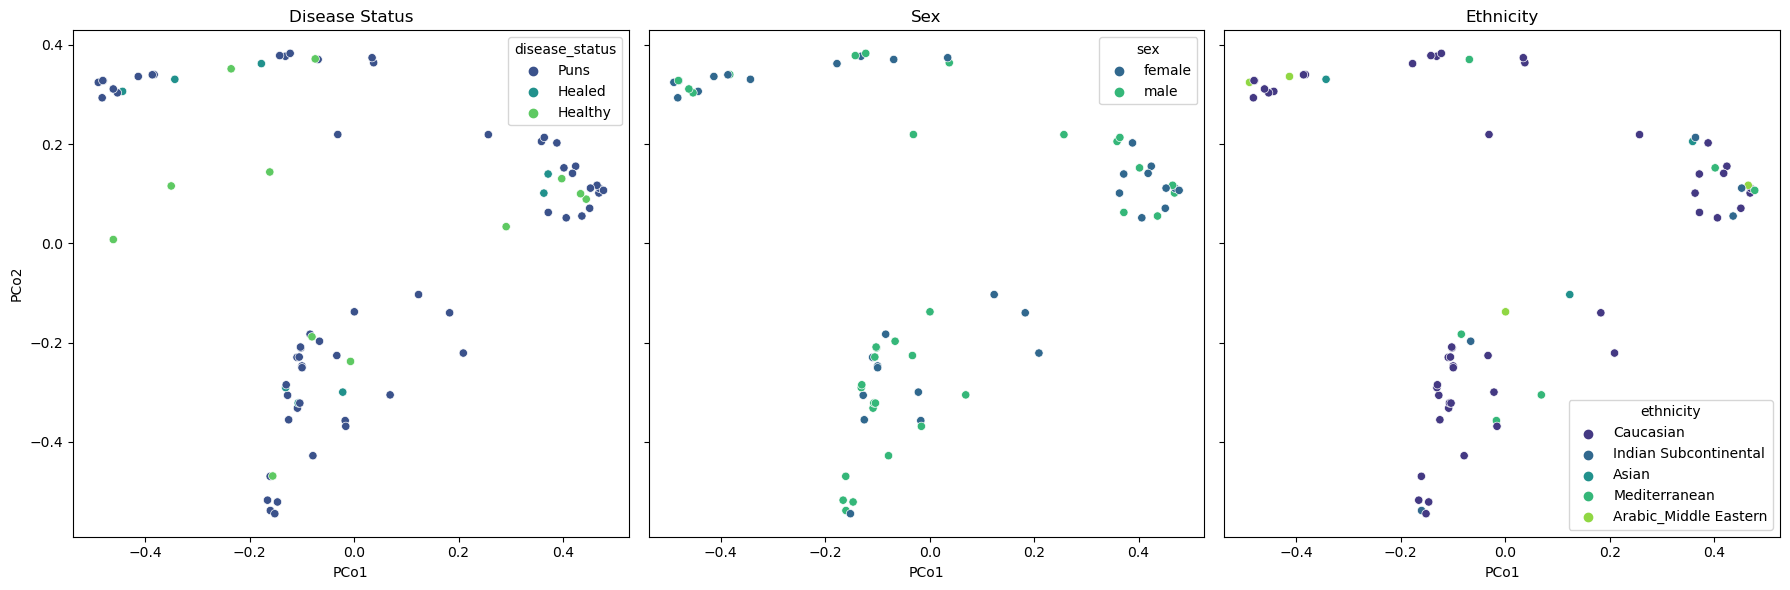

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Scatterplot for disease_status
sns.scatterplot(data=pcs_data_with_md,
                x='Axis 1',
                y='Axis 2',
                hue='disease_status',
                palette='viridis',
                ax=axes[0])
axes[0].set_title("Disease Status")
axes[0].set_xlabel("PCo1")
axes[0].set_ylabel("PCo2")

# Scatterplot for sex
sns.scatterplot(data=pcs_data_with_md,
                x='Axis 1',
                y='Axis 2',
                hue='sex',
                palette='viridis',
                ax=axes[1])
axes[1].set_title("Sex")
axes[1].set_xlabel("PCo1")

# Scatterplot for ethnicity
sns.scatterplot(data=pcs_data_with_md,
                x='Axis 1',
                y='Axis 2',
                hue='ethnicity',
                palette='viridis',
                ax=axes[2])
axes[2].set_title("Ethnicity")
axes[2].set_xlabel("PCo1")

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
pcs_ji = q2.Artifact.load(os.path.join(data_dir_div, 'core_metrics_results/jaccard_pcoa_results.qza'))
pcs_ji = pcs_ji.view(OrdinationResults)

pcs_data_ji = pcs_ji.samples.iloc[:,:2]

pcs_data_ji.columns = ['Axis 1', 'Axis 2']

In [19]:
pcs_data_with_md_ji = pd.concat([pcs_data_ji, metadata], axis=1, join='inner')
pcs_data_with_md_ji.head()

,Axis 1,Axis 2,patient_id,age,sex,ethnicity,continent,country,region,city,group,disease_subgroup,blinded_clinical_response,puns_per_hour_pre_treatment,puns_per_hour_post_treatment,time_point,subgroup_response,disease_status
SRR10505051,0.136840,0.185801,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,post-treatment,Placebo_NR,Puns
SRR10505052,-0.132679,0.019205,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,pre-treatment,Placebo_NR,Puns
SRR10505053,-0.166741,0.003256,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,pre-treatment,Placebo_Res,Puns
SRR10505056,-0.076568,0.181875,1044,34.0,male,Indian Subcontinental,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NaN,4.0,NaN,post-treatment,NaN,Puns
SRR10505057,-0.052955,-0.297694,1043,35.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,FMT,NR,9.0,6.0,post-treatment,FMT_NR,Puns


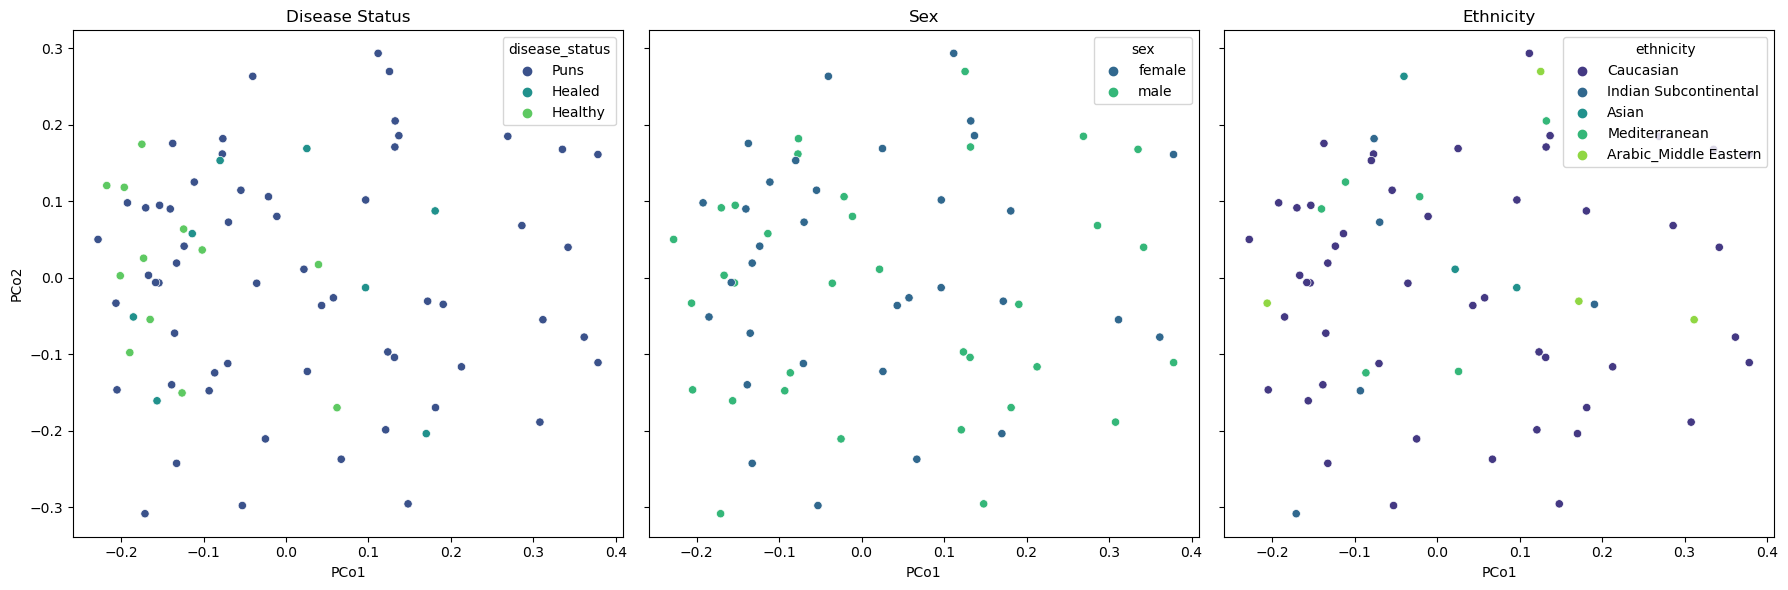

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Scatterplot for disease_status
sns.scatterplot(data=pcs_data_with_md_ji,
                x='Axis 1',
                y='Axis 2',
                hue='disease_status',
                palette='viridis',
                ax=axes[0])
axes[0].set_title("Disease Status")
axes[0].set_xlabel("PCo1")
axes[0].set_ylabel("PCo2")

# Scatterplot for sex
sns.scatterplot(data=pcs_data_with_md_ji,
                x='Axis 1',
                y='Axis 2',
                hue='sex',
                palette='viridis',
                ax=axes[1])
axes[1].set_title("Sex")
axes[1].set_xlabel("PCo1")

# Scatterplot for ethnicity
sns.scatterplot(data=pcs_data_with_md_ji,
                x='Axis 1',
                y='Axis 2',
                hue='ethnicity',
                palette='viridis',
                ax=axes[2])
axes[2].set_title("Ethnicity")
axes[2].set_xlabel("PCo1")

# Adjust layout
plt.tight_layout()
plt.show()
